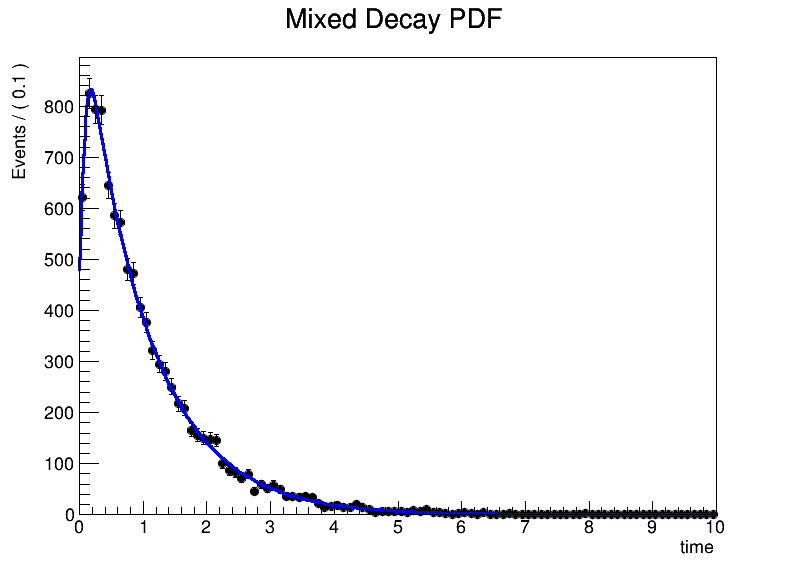

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file BMixDecay_plot.png has been created


In [9]:
import ROOT
from ROOT import RooFit, RooRealVar, RooArgSet, RooCategory, RooBMixDecay, RooGaussModel
from IPython.display import Image, display

# Define the time variable
t = ROOT.RooRealVar("t", "time", 0, 10)  # Time variable

# Define parameters for the decay
tau = ROOT.RooRealVar("tau", "tau", 1.0, 0.1, 10.0)  # Lifetime
dm = ROOT.RooRealVar("dm", "dm", 0.5, 0.0, 2.0)  # Mass difference

# Define mistagging and additional parameters
mistag = ROOT.RooRealVar("mistag", "mistag rate", 0.1, 0.0, 1.0)  # Mistag rate
delMistag = ROOT.RooRealVar("delMistag", "additional mistag", 0.0, -1.0, 1.0)  # Additional mistag rate

# Define categories for mixing state and tagging flavor
mixState = ROOT.RooCategory("mixState", "mixState")
mixState.defineType("B0")
mixState.defineType("Bbar0")

tagFlav = ROOT.RooCategory("tagFlav", "tagFlav")
tagFlav.defineType("tagged")
tagFlav.defineType("untagged")


# Use a RooGaussModel for the time resolution (which is a valid RooResolutionModel)
timeResMean = RooRealVar("timeResMean", "Time Resolution Mean", 0.0)
timeResSigma = RooRealVar("timeResSigma", "Time Resolution Sigma", 0.1)
resModel = RooGaussModel("resModel", "Gaussian Time Resolution", t, timeResMean, timeResSigma)

# Create the mixed decay PDF
mix_decay_pdf = RooBMixDecay(
    "mix_decay_pdf", "B-mixing decay PDF", t, mixState, tagFlav, tau, dm, mistag, delMistag,resModel, ROOT.RooBMixDecay.SingleSided
)

# Generate toy data from the mixed decay PDF
data = mix_decay_pdf.generate(RooArgSet(t), 10000)

# Create a frame for plotting
tframe = t.frame(RooFit.Title("Mixed Decay PDF"))

# Plot the generated data
data.plotOn(tframe)

# Plot the mixed decay PDF on the same frame
mix_decay_pdf.plotOn(tframe)

# Create a canvas to draw the plot
c1 = ROOT.TCanvas("c1", "Mixed Decay", 800, 600)
tframe.Draw()

# Save the plot as an image
c1.SaveAs("BMixDecay_plot.png")

# Display the image in Jupyter notebook
display(Image(filename="BMixDecay_plot.png"))
